**ANEXOS 1**





**TEMA:
Predicción de estrategias de eliminación de genes (gene knockout) usando el algoritmo de programación lineal (OptKnock) en Python en el modelo metabólico a escala del genoma (GEM) iYali4  de Yarrowia lipolytica , para optimizar la producción de licopeno**

AUTOR: MILTON GIOVANNI QUINGA SOCASI

**MAGISTER EN BIOLOGÍA COMPUTACIONAL**

**UNIVERSIDAD DE LAS FUERZAS ARMADAS ESPE**

DESARROLADO EN JUPYTER NOTEBOOK DE GOOGLE COLAB.

**PYTHON VERSION 3.10.12**

NOVIEMBRE 2024

In [1]:
#Para consultar la versión de Python
!python --version

Python 3.10.12


**Instalación de paquetes para Ingeniería Metabólica. Cobrapy y Cameo**

Para importar Computer Aided Metabolic Engineering and Optimization (Cameo).

https://cameo.bio/


In [2]:
#Importar Cameo
!pip install cameo

  Preparing metadata (setup.py) ... done
Reason for being yanked: deprecated
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.0/77.0 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.8/141.8 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 92.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 56.4

Para importar Constraint-Based Metabolic Modeling in Python (Cobrapy)


https://cobrapy.readthedocs.io/en/latest/getting_started.html

In [3]:
#Importar Cobrapy
!pip install cobra

**1. Importación del modelo metabólico iYali4 de Yarrowia lipolytica con Cameo**



In [4]:
#Para importar modelos del Internet
from cameo import models

In [5]:
# Para importar el modelo de la University of Minho (http://darwin.di.uminho.pt/models.)
modelyal1 = models.minho. iYali4

Se han truncado las últimas 5000 líneas del flujo de salida.


In [6]:
#Para mostrar un resumen deL modelo metabólico iYali4
modelyal1

Name,yli
Memory address,79915e75d7b0
Number of metabolites,1683
Number of reactions,1985
Number of genes,901
Number of groups,93
Objective expression,1.0*2111 - 1.0*2111_reverse_1a0a2
Compartments,"cytoplasm, mitochondrion, cell envelope, vacuolar membrane, endoplasmic reticulum, peroxisome, nucleus, extracellular, endoplasmic reticulum membrane, Golgi, mitochondrial membrane, lipid particle, Golgi membrane, vacuole"


In [7]:
from cobra.summary import summary
#Resumen del modelo
modelyal1.summary()


Metabolite,Reaction,Flux,C-Number,C-Flux
m1031,1654,0.5065,0,0.00%
m511,1714,0.649,0,0.00%
m342,1832,3.797,0,0.00%
m1339,1992,1.666,0,0.00%
m215,2005,0.02695,0,0.00%
m1113,2060,0.01104,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
m1176,1672,-1.74,0,0.00%
m214,2100,-7.639,0,0.00%
m1401,2111,-0.05664,0,0.00%


Se compone de 1683 metabolitos y 1985 Reacciones

In [8]:
# Para ubicar función objetivo. reacción 2111 biomasa
modelyal1.reactions.get_by_id("2111") #funcion objetivo es la de crecimiento que produce biomasa

Reaction identifier,2111
Name,growth
Memory address,0x79915db02020
Stoichiometry,m1401 --> biomass_ -->
GPR,
Lower bound,0.0
Upper bound,1000.0


**2. Identificación de las reacciones de la ruta del mevalonato en el modelo metabólico iYali4 de Yarrowia lipolytica**

- Acetoacetil-CoA tiolasa.ERG10

In [9]:
modelyal1.reactions.get_by_id("103")

Reaction identifier,103
Name,acetyl-CoA C-acetyltransferase
Memory address,0x79915e2bfd90
Stoichiometry,2.0 m68 <=> m189 + m69 2.0 acetyl-CoA_C23H38N7O17P3S <=> acetoacetyl-CoA_C25H40N7O18P3S + coenzyme A_C21H36N7O16P3S
GPR,YALI0B08536g
Lower bound,-1000.0
Upper bound,1000.0


In [10]:
modelyal1.reactions.get_by_id("104")

Reaction identifier,104
Name,acetyl-CoA C-acetyltransferase
Memory address,0x79915e2bfe50
Stoichiometry,2.0 m71 <=> m190 + m73 2.0 acetyl-CoA_C23H38N7O17P3S <=> acetoacetyl-CoA_C25H40N7O18P3S + coenzyme A_C21H36N7O16P3S
GPR,YALI0E11099g
Lower bound,-1000.0
Upper bound,1000.0


In [11]:
#Metabolito
modelyal1.metabolites.get_by_id('m190')

Metabolite identifier,m190
Name,acetoacetyl-CoA_C25H40N7O18P3S
Memory address,0x79915e600820
Formula,None
Compartment,C_mi
In 4 reaction(s),"R00410, yli0055, 104, 560"


- HMG-CoA sintasa. ERG13

In [12]:
modelyal1.reactions.get_by_id("560")

Reaction identifier,560
Name,hydroxymethylglutaryl CoA synthase
Memory address,0x79915e0f8ee0
Stoichiometry,m190 + m26 + m71 --> m28 + m648 + m73 acetoacetyl-CoA_C25H40N7O18P3S + H2O_H2O + acetyl-CoA_C23H38N7O17P3S --> H+_p+1 + 3-hydroxy-3-methylglutaryl-CoA_C27H44N7O20P3S + coenzyme A_C21H36N7O16P3S
GPR,YALI0F30481g
Lower bound,0.0
Upper bound,1000.0


- HMG-CoA reductasa. HMG1

In [13]:
modelyal1.reactions.get_by_id("558")

Reaction identifier,558
Name,hydroxymethylglutaryl CoA reductase
Memory address,0x79915e0f8e80
Stoichiometry,2.0 m10 + 2.0 m40 + m646 --> 2.0 m41 + m647 + m69 2.0 H+_p+1 + 2.0 NADPH_C21H30N7O17P3 + 3-hydroxy-3-methylglutaryl-CoA_C27H44N7O20P3S --> 2.0 NADP(+)_C21H28N7O17P3 + (R)-mevalonate_C6H12O4 + coenzyme A_C21H36N7O16P3S
GPR,YALI0E04807g
Lower bound,0.0
Upper bound,1000.0


- Mevalonato quinasa. ERG12

In [14]:
modelyal1.reactions.get_by_id("735")

Reaction identifier,735
Name,mevalonate kinase (atp)
Memory address,0x79915dfc7af0
Stoichiometry,m141 + m647 --> m10 + m143 + m811 ATP_C10H16N5O13P3 + (R)-mevalonate_C6H12O4 --> H+_p+1 + ADP_C10H15N5O10P2 + (R)-5-phosphomevalonic acid_C6H13O7P
GPR,YALI0B16038g
Lower bound,0.0
Upper bound,1000.0


In [15]:
#Metabolito
modelyal1.metabolites.get_by_id('m647')

Metabolite identifier,m647
Name,(R)-mevalonate_C6H12O4
Memory address,0x79915e639e10
Formula,None
Compartment,C_cy
In 6 reaction(s),"738, 558, 735, 737, 1096, 736"


- Fosfomevalonato quinasa. ERG8

In [16]:
modelyal1.reactions.get_by_id("904")

Reaction identifier,904
Name,phosphomevalonate kinase
Memory address,0x79915e08b9a0
Stoichiometry,m141 + m811 --> m143 + m812 ATP_C10H16N5O13P3 + (R)-5-phosphomevalonic acid_C6H13O7P --> ADP_C10H15N5O10P2 + (R)-5-diphosphomevalonic acid_C6H14O10P2
GPR,YALI0E06193g
Lower bound,0.0
Upper bound,1000.0


- Mevalonato pirofosfato descarboxilasa. MVD1

In [17]:
modelyal1.reactions.get_by_id("739")

Reaction identifier,739
Name,mevalonate pyrophoshate decarboxylase
Memory address,0x79915dff65c0
Stoichiometry,m141 + m812 --> m143 + m35 + m491 + m82 ATP_C10H16N5O13P3 + (R)-5-diphosphomevalonic acid_C6H14O10P2 --> ADP_C10H15N5O10P2 + phosphate_H3O4P + isopentenyl diphosphate_C5H12O7P2 + carbon dioxide_CO2
GPR,YALI0F05632g
Lower bound,0.0
Upper bound,1000.0


- Isopentenil difosfato:dimetilalil difosfato isomerasa. IDI1

In [18]:
modelyal1.reactions.get_by_id("667")
#Isopentenyl diphosphate <=> Dimethylallyl diphosphate dimetilalil-pirofosfato (DMAPP) es prenyl diphosphate_C5H9O7P2

Reaction identifier,667
Name,isopentenyl-diphosphate D-isomerase
Memory address,0x79915e1899c0
Stoichiometry,m491 <=> m492 isopentenyl diphosphate_C5H12O7P2 <=> prenyl diphosphate_C5H9O7P2
GPR,YALI0F04015g
Lower bound,-1000.0
Upper bound,1000.0


- Farnesil pirofosfato sintetasa. ERG20

- ERG20, para producir geranil-difosfato (geranil-PP)

In [19]:
modelyal1.reactions.get_by_id("355")

Reaction identifier,355
Name,dimethylallyltranstransferase
Memory address,0x79915e25d4b0
Stoichiometry,m491 + m492 --> m203 + m493 isopentenyl diphosphate_C5H12O7P2 + prenyl diphosphate_C5H9O7P2 --> diphosphate_H4O7P2 + geranyl diphosphate_C10H20O7P2
GPR,YALI0E05753g
Lower bound,0.0
Upper bound,1000.0


In [20]:
#Metabolito
modelyal1.metabolites.get_by_id('m493')

Metabolite identifier,m493
Name,geranyl diphosphate_C10H20O7P2
Memory address,0x79915e638130
Formula,None
Compartment,C_cy
In 2 reaction(s),"462, 355"


- ERG20, para producir farnesil-difosfato (farnesil-PP).

In [21]:
modelyal1.reactions.get_by_id("462")

Reaction identifier,462
Name,geranyltranstransferase
Memory address,0x79915e22e320
Stoichiometry,m491 + m493 --> m203 + m512 isopentenyl diphosphate_C5H12O7P2 + geranyl diphosphate_C10H20O7P2 --> diphosphate_H4O7P2 + farnesyl diphosphate_C15H25O7P2
GPR,YALI0E05753g
Lower bound,0.0
Upper bound,1000.0


- Geranilgeranil difosfato sintasa. BTS1

In [22]:
#Reaccion del geranylgeranyl diphosphate
modelyal1.metabolites.get_by_id('m513') #geranylgeranyl diphosphate

Metabolite identifier,m513
Name,geranylgeranyl diphosphate_C20H36O7P2
Memory address,0x79915e6384f0
Formula,None
Compartment,C_cy
In 2 reaction(s),"461, 373"


In [23]:
modelyal1.reactions.get_by_id("373")

Reaction identifier,373
Name,farnesyltranstransferase
Memory address,0x79915e25f250
Stoichiometry,m491 + m512 --> m203 + m513 isopentenyl diphosphate_C5H12O7P2 + farnesyl diphosphate_C15H25O7P2 --> diphosphate_H4O7P2 + geranylgeranyl diphosphate_C20H36O7P2
GPR,YALI0D17050g
Lower bound,0.0
Upper bound,1000.0


**3. Adición de vías heterólogas usando los comandos de COBRApy, en el caso de que las vías metabólicas estén ausentes en la levadura**

**3.1. Adición de la reacción:
2 Geranylgeranyl diphosphate <=> 15-cis-Phytoene + 2 Diphosphate**

**La fitoeno sintasa (CrtB, de P. ananatis) condensa dos moléculas de GGPP para formar fitoeno**



In [24]:
#Para crear modelos metabólicos
from cobra import Model, Reaction, Metabolite

In [25]:
#Creación de la reacción
reactionp = Reaction('R_phytoene')
reactionp.name = '15 cis phytoene-forming'
reactionp.subsystem = '	Carotenoid biosynthesis'
reactionp.lower_bound = -1000.  # This is the default
reactionp.upper_bound = 1000.  # This is the default

In [26]:
reactionp

Reaction identifier,R_phytoene
Name,15 cis phytoene-forming
Memory address,0x79915c324b50
Stoichiometry,<=> <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [27]:
#Creación de metabolitos
#Diphosphate ya existe:
modelyal1.metabolites.get_by_id('m203')


Metabolite identifier,m203
Name,diphosphate_H4O7P2
Memory address,0x79915e600a90
Formula,None
Compartment,C_cy
In 74 reaction(s),"512, R00434, 220, 785, 820, 1091, 373, 525, 774, 852, 915, 462, 786, 539, 1747, R00426, 211, 459, 910, 355, R00720, 3536, 208, 1066, 665, 885, 701, 479, 568, 726, 3587, 1036, 941, R00662, 112,..."


In [28]:
#Geranylgeranyl diphosphateya existe
modelyal1.metabolites.get_by_id('m513')

Metabolite identifier,m513
Name,geranylgeranyl diphosphate_C20H36O7P2
Memory address,0x79915e6384f0
Formula,None
Compartment,C_cy
In 2 reaction(s),"461, 373"


In [29]:
#Asignación del metabolito GGPP
GGPP_C = modelyal1.metabolites.get_by_id('m513')

In [30]:
GGPP_C

Metabolite identifier,m513
Name,geranylgeranyl diphosphate_C20H36O7P2
Memory address,0x79915e6384f0
Formula,None
Compartment,C_cy
In 2 reaction(s),"461, 373"


In [31]:
#Asignación del metabolito PP
PP_C = modelyal1.metabolites.get_by_id('m203')

In [32]:
PP_C

Metabolite identifier,m203
Name,diphosphate_H4O7P2
Memory address,0x79915e600a90
Formula,None
Compartment,C_cy
In 74 reaction(s),"512, R00434, 220, 785, 820, 1091, 373, 525, 774, 852, 915, 462, 786, 539, 1747, R00426, 211, 459, 910, 355, R00720, 3536, 208, 1066, 665, 885, 701, 479, 568, 726, 3587, 1036, 941, R00662, 112,..."


In [33]:
# Creación del metabolito 15-cis-Phytoene
phytoene_c = Metabolite(
    'mphytoene_c',
    formula='C40H64',
    name='15-cis-phytoene',
    compartment='c')

In [34]:
phytoene_c

Metabolite identifier,mphytoene_c
Name,15-cis-phytoene
Memory address,0x79915d8d6800
Formula,C40H64
Compartment,c
In 0 reaction(s),


In [35]:
#Adición de los metabolitos a la reacción

reactionp.add_metabolites({
    GGPP_C: -2.0,
    PP_C: 2.0,
    phytoene_c: 1.0
   })

reactionp.reaction  # This gives a string representation of the reaction

'2.0 m513 <=> 2.0 m203 + mphytoene_c'

In [36]:
#Adición de los genes
reactionp.gene_reaction_rule = '( CrtB )'
reactionp.genes

frozenset({<Gene CrtB at 0x79915d8d6410>})

In [37]:
#Agregación de la reacción al modelo, que también agregará todos los metabolitos y genes asociados.
modelyal1.add_reactions([reactionp])

In [38]:
#Verificación de la reacción
modelyal1.reactions.get_by_id("R_phytoene")


Reaction identifier,R_phytoene
Name,15 cis phytoene-forming
Memory address,0x79915c324b50
Stoichiometry,2.0 m513 <=> 2.0 m203 + mphytoene_c 2.0 geranylgeranyl diphosphate_C20H36O7P2 <=> 2.0 diphosphate_H4O7P2 + 15-cis-phytoene
GPR,CrtB
Lower bound,-1000.0
Upper bound,1000.0


In [39]:
#Verificación las reacciones con una optimizacion FBA
solution = modelyal1.optimize()
print(solution)
solution

<Solution 0.057 at 0x79915c324a90>


,fluxes,reduced_costs
1,0.000000,-2.873507e-02
2,0.000000,-2.873507e-02
4,0.000000,2.385245e-18
5,0.025006,0.000000e+00
6,0.000000,0.000000e+00
...,...,...
yli0052,0.000000,3.382711e-17
yli0053,0.000000,-4.336809e-19
yli0054,0.000000,-0.000000e+00
yli0055,0.000000,-1.387779e-17


**3.4. Adicionamos la reacción: usando como el par de aceptor/reductor: FAD/FADH2**

**15-cis-Phytoene + 4 Acceptor <=> Lycopene + 4 Reduced acceptor***

In [40]:
#Creación de la reacción
reaction3 = Reaction('R_LycopeneFAD')
reaction3.name = 'lycopene-formingFAD'
reaction3.subsystem = '	Carotenoid biosynthesis'
reaction3.lower_bound = -1000.  # Por default
reaction3.upper_bound = 1000.  # Por default

In [41]:
reaction3

Reaction identifier,R_LycopeneFAD
Name,lycopene-formingFAD
Memory address,0x79915c324cd0
Stoichiometry,<=> <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [42]:
#Creación de metabolitos
# El aceptor es FAD
modelyal1.metabolites.get_by_id('m563')

Metabolite identifier,m563
Name,FAD_C27H33N9O15P2
Memory address,0x79915e638e50
Formula,None
Compartment,C_mi
In 6 reaction(s),"1790, yli0053, 490, 940, yli0052, yli0047"


In [43]:
#Asignación del aceptor FAD
FAD_C= modelyal1.metabolites.get_by_id('m563')

In [44]:
FAD_C

Metabolite identifier,m563
Name,FAD_C27H33N9O15P2
Memory address,0x79915e638e50
Formula,None
Compartment,C_mi
In 6 reaction(s),"1790, yli0053, 490, 940, yli0052, yli0047"


In [45]:
# El aceptor reducido es FADH2
modelyal1.metabolites.get_by_id('m566')

Metabolite identifier,m566
Name,FADH2_C27H35N9O15P2
Memory address,0x79915e638ee0
Formula,None
Compartment,C_mi
In 6 reaction(s),"1151, 490, yli0053, yli0052, yli0047, 940"


In [46]:
FADH_C=modelyal1.metabolites.get_by_id('m566')

In [47]:
FADH_C

Metabolite identifier,m566
Name,FADH2_C27H35N9O15P2
Memory address,0x79915e638ee0
Formula,None
Compartment,C_mi
In 6 reaction(s),"1151, 490, yli0053, yli0052, yli0047, 940"


In [48]:
#Creación del metabolito Licopeno
Lycopene_c = Metabolite(
    'mlycopene_c',
    formula='C40H56',
    name='Lycopene',
    compartment='c')


In [49]:
#Adición de los metabolitos a la reacción

reaction3.add_metabolites({
    phytoene_c: -1.0,
    FAD_C: -4.0,
    Lycopene_c: 1.0,
    FADH_C: 4.0
   })

In [50]:
reaction3.reaction

'4.0 m563 + mphytoene_c <=> 4.0 m566 + mlycopene_c'

In [51]:
#Adición de los genes
reaction3.gene_reaction_rule = '( CrtI )'
reaction3.genes

frozenset({<Gene CrtI at 0x79915d8d61d0>})

In [52]:
#Agregación de la reacción al modelo
modelyal1.add_reactions([reaction3])

In [53]:
#Verificación de la reacción
modelyal1.reactions.get_by_id("R_LycopeneFAD")

Reaction identifier,R_LycopeneFAD
Name,lycopene-formingFAD
Memory address,0x79915c324cd0
Stoichiometry,4.0 m563 + mphytoene_c <=> 4.0 m566 + mlycopene_c 4.0 FAD_C27H33N9O15P2 + 15-cis-phytoene <=> 4.0 FADH2_C27H35N9O15P2 + Lycopene
GPR,CrtI
Lower bound,-1000.0
Upper bound,1000.0


In [54]:
#Verificación de las reacciones con una optimización
solution3 = modelyal1.optimize()

In [55]:
solution3

,fluxes,reduced_costs
1,0.000000,-2.873507e-02
2,0.000000,-2.873507e-02
4,0.000000,4.770490e-18
5,0.025006,2.775558e-17
6,0.000000,-2.775558e-17
...,...,...
yli0053,0.000000,-4.336809e-19
yli0054,0.000000,-0.000000e+00
yli0055,0.000000,6.852158e-17
R_phytoene,0.000000,-0.000000e+00


**3.5. Adición de la reacción de Demanda de licopeno**



https://cnls.lanl.gov/external/qbio2018/Slides/FBA%202/qBio-FBA-lab-slides.pdf


In [56]:
reactiond = Reaction('LYCO-dem')
reactiond.name = 'Lycopene demand'
reactiond.subsystem = 'Lycopene biosynthesis'
reactiond.lower_bound = 0
reactiond.upper_bound = 1000
reactiond.add_metabolites({Lycopene_c: -1.0})
#modelyal1.add_reaction(reactiond)
modelyal1.add_reactions([reactiond])

In [57]:
#Verificación la reacción
modelyal1.reactions.get_by_id("LYCO-dem")

Reaction identifier,LYCO-dem
Name,Lycopene demand
Memory address,0x79915c644d60
Stoichiometry,mlycopene_c --> Lycopene -->
GPR,
Lower bound,0
Upper bound,1000


In [58]:
#Modificación de la función objetivo

modelyal1.reactions.get_by_id('2111').objective_coefficient = 1.0
modelyal1.reactions.get_by_id('LYCO-dem').objective_coefficient = 1.0


**Se realizó un analisis FBA para verificar la adición de las reacciones heterólogas**

In [59]:
solution4 = modelyal1.optimize()

In [60]:
print(solution4)

<Solution 0.063 at 0x79915c644490>


In [61]:
solution4

,fluxes,reduced_costs
1,0.000000,-2.321455e-02
2,0.000000,-2.321455e-02
4,0.000000,-3.252607e-19
5,0.009931,0.000000e+00
6,0.000000,-5.551115e-17
...,...,...
yli0054,0.000000,-0.000000e+00
yli0055,0.000000,-1.994932e-17
R_phytoene,0.040611,0.000000e+00
R_LycopeneFAD,0.040611,2.015176e-16


In [62]:
modelyal1.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
m1031,1654,0.2012,0,0.00%
m511,1714,0.649,0,0.00%
m342,1832,1.567,0,0.00%
m1339,1992,0.8162,0,0.00%
m215,2005,0.0107,0,0.00%
m1113,2060,0.004386,0,0.00%
Metabolite,Reaction,Flux,C-Number,C-Flux
m1176,1672,-1.414,0,0.00%
m214,2100,-4.244,0,0.00%
m1401,2111,-0.02249,0,0.00%


**4.Optimización de  la producción de licopeno. FBA**

**Para obtener los resultados de salida del FBA en:**

Tasa de crecimiento (biomasa) (1/h)

Tasa de producción de licopeno (mmol/gdcw/h)

Rendimiento de licopeno
(mol/mol glucose)


**4.1. FBA aplicado con todas las reacciones heterólogas y los aceptores/aceptores reducidos (NAD/NADH; NADP/NADPH2, FAD/FADH2)**.

**4.4. FBA aplicado con las reacciones heterólogas y los aceptores/aceptores reducidos FAD/FADH2**

In [63]:
solution7 = modelyal1.optimize()

In [64]:
solution7

,fluxes,reduced_costs
1,0.000000,0.000000e+00
2,0.000000,6.505213e-19
4,0.000000,6.505213e-19
5,0.009931,0.000000e+00
6,0.000000,-5.551115e-17
...,...,...
yli0054,0.000000,0.000000e+00
yli0055,0.000000,-4.553649e-17
R_phytoene,0.040611,0.000000e+00
R_LycopeneFAD,0.040611,0.000000e+00


In [65]:
#Para la tasa de crecimiento reacción de biomasa
print('Growth Rate (1/h): ' + str(solution7.get_primal_by_id('2111')))

Growth Rate (1/h): 0.022493643984940238


In [66]:
#Para obtener el valor del flujo de producción de licopeno
print('Lycopene Production Rate (mmol/gdcw/h): ' + str(solution7.get_primal_by_id('LYCO-dem')))

Lycopene Production Rate (mmol/gdcw/h): 0.040610833015264934


In [67]:
#Para el rendimiento
print('Lycopene Yield (mol/mol glucose): ' +
str(-solution7.get_primal_by_id('LYCO-dem')/solution7.get_primal_by_id('1714')))

Lycopene Yield (mol/mol glucose): 0.06257447305895983


**5. Identificación de las reacciones involucradas en el medio de cultivo para el modelo iYali4 de Yarrowia lipolytica**

In [68]:
# Para chequear el medio
modelyal1.medium

{'1654': 1000.0,
 '1714': 0.649,
 '1832': 1000.0,
 '1992': 1000.0,
 '2005': 1000.0,
 '2060': 1000.0,
 '2100': 1000.0}

In [69]:
#Para ver las reacciones del medio
modelyal1.reactions.get_by_id("1654")

Reaction identifier,1654
Name,ammonium exchange
Memory address,0x79915dbbb880
Stoichiometry,m1031 <=> ammonium_H3N <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [70]:
modelyal1.reactions.get_by_id("1714")

Reaction identifier,1714
Name,D-glucose exchange
Memory address,0x79915dbee740
Stoichiometry,m511 <=> D-glucose_C6H12O6 <=>
GPR,
Lower bound,-0.649
Upper bound,1000.0


In [71]:
modelyal1.reactions.get_by_id("1832")

Reaction identifier,1832
Name,H+ exchange
Memory address,0x79915dc510f0
Stoichiometry,m342 <=> H+_p+1 <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [72]:
modelyal1.reactions.get_by_id("1992")

Reaction identifier,1992
Name,oxygen exchange
Memory address,0x79915dacc100
Stoichiometry,m1339 <=> oxygen_O2 <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [73]:
modelyal1.reactions.get_by_id("2005")

Reaction identifier,2005
Name,phosphate exchange
Memory address,0x79915daccdf0
Stoichiometry,m215 <=> phosphate_H3O4P <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [74]:
modelyal1.reactions.get_by_id("2060")

Reaction identifier,2060
Name,sulphate exchange
Memory address,0x79915dacf400
Stoichiometry,m1113 <=> sulphate_H2O4S <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [75]:
modelyal1.reactions.get_by_id("2100")

Reaction identifier,2100
Name,water exchange
Memory address,0x79915dbb9f30
Stoichiometry,m214 <=> H2O_H2O <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


6. Predicción de estrategias de eliminación de genes (gene knockout) usando el algoritmo de programación lineal (OptKnock)

In [78]:
#Para importar OptKnock
from cameo.strain_design.deterministic.linear_programming import OptKnock

In [79]:
#Para aplicar el algoritmo OptKnock en el modelo metabolico
#Ejecutar múltiples knockouts con OptKnock puede llevar algunas horas o días...
optknock = OptKnock(modelyal1, fraction_of_optimum=0.5, exclude_non_gene_reactions=True, exclude_reactions=['xBIOMASS'])

/usr/local/lib/python3.10/dist-packages/cameo/strain_design/deterministic/linear_programming.py:118: UserWarning: You are trying to run OptKnock with glpk_interface. This might not end well.
  warnings.warn("You are trying to run OptKnock with %s. This might not end well." %
/usr/local/lib/python3.10/dist-packages/cameo/flux_analysis/analysis.py:419: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the 

In [80]:
result = optknock.run(max_knockouts=1,  target='LYCO-dem', biomass='2111', max_results=3)

In [81]:
result

HBox()

/usr/local/lib/python3.10/dist-packages/cameo/flux_analysis/analysis.py:419: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.lower_bound[lb_higher_ub.index] = df.upper_bound[lb_higher_ub.index]
/usr/local/lib/python3.10/dist-packages/cameo/

,reactions,size,LYCO-dem,biomass,fva_min,fva_max
0,{888},1,0.056687,0.0,0.05612,0.056687
1,{760},1,0.056687,0.0,0.05612,0.056687
2,{127},1,0.056687,0.0,0.05612,0.056687
3,{3722},1,0.056687,0.0,0.05612,0.056687


In [82]:

#para crear el dataframe
import pandas as pd # Import pandas if you haven't already

# Access the results through the 'data_frame' attribute
df = result.data_frame

# Rename columns to match your desired names
df = df.rename(columns={
    'objective_value': 'growth_rate', # Assumed column name for growth rate
    'target': 'target_production', # Assumed column name for target production
    'reaction_knockouts': 'knockouts' # Assumed column name for knockouts
})

print(df)

  reactions  size  LYCO-dem  biomass  fva_min   fva_max
0     {888}     1  0.056687      0.0  0.05612  0.056687
1     {760}     1  0.056687      0.0  0.05612  0.056687
2     {127}     1  0.056687      0.0  0.05612  0.056687
3    {3722}     1  0.056687      0.0  0.05612  0.056687


In [ ]:
modelyal1.reactions.get_by_id("xBIOMASS")

Reaction identifier,xBIOMASS
Name,Biomass production
Memory address,0x7ec4ca62f2b0
Stoichiometry,0.4415 m1123 + 0.1104 m1324 + 86.7881 m141 + 0.0623 m149 + m1726 + m1727 + 0.0032 m294 + 0.4068 m401 + 0.0377 m459 + 0.0377 m465 + 0.0383 m505 + 0.0757 m86 + 0.0383 m89 + 0.093 m93 + 0.0578 m95 -->... 0.4415 (1-3)-beta-D-glucan_ + 0.1104 mannan_ + 86.7881 ATP_C10H16N5O13P3 + 0.0623 UMP_C9H13N2O9P + protein_ + lipids_ + 0.0032 trehalose_C12H22O11 + 0.4068 chitin_H2O(C8H13NO5)n + 0.0377...
GPR,
Lower bound,0.0
Upper bound,1000.0


In [83]:
modelyal1.reactions.get_by_id("888")

Reaction identifier,888
Name,phosphoglucomutase
Memory address,0x79915def37c0
Stoichiometry,m296 <=> m589 D-glucose 6-phosphate_C6H13O9P <=> D-glucose 1-phosphate_C6H13O9P
GPR,YALI0E02090g
Lower bound,-1000.0
Upper bound,1000.0


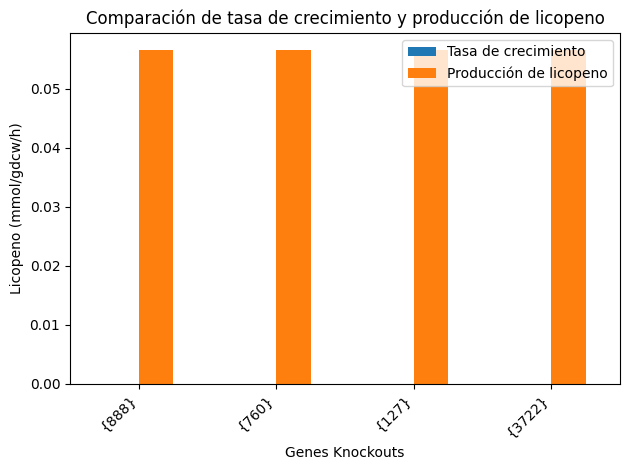

In [86]:
import matplotlib.pyplot as plt

# Suponiendo que 'df' es tu DataFrame
df.plot(x='reactions', y=['biomass', 'LYCO-dem'], kind='bar')
plt.title('Comparación de tasa de crecimiento y producción de licopeno')
plt.xlabel('Genes Knockouts')
plt.ylabel('Licopeno (mmol/gdcw/h)')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
plt.legend(['Tasa de crecimiento', 'Producción de licopeno'])
plt.tight_layout()  # Ajustar el diseño para evitar que se superpongan elementos
plt.show()

**7. Eliminación de genes (Knockout) en Yarrowia lipolytica**

7.1. Para el gen
PGM2 (phosphoglucomutase) id: 	YALI0E02090g (GPR)


kegg https://www.genome.jp/dbget-bin/www_bget?ko+K15779

In [87]:
#Para identificar el gen e la reaccion 888, dado que todas las eliminaciones tienen el mismo efecto
modelyal1.reactions.get_by_id("888")

Reaction identifier,888
Name,phosphoglucomutase
Memory address,0x79915def37c0
Stoichiometry,m296 <=> m589 D-glucose 6-phosphate_C6H13O9P <=> D-glucose 1-phosphate_C6H13O9P
GPR,YALI0E02090g
Lower bound,-1000.0
Upper bound,1000.0


In [88]:
#Para simular el knockout
modelyal1.genes.YALI0E02090g.knock_out()

In [89]:
pgm2= modelyal1.optimize()

In [90]:
pgm2

,fluxes,reduced_costs
1,0.000000e+00,0.000000e+00
2,0.000000e+00,-1.366001e-17
4,0.000000e+00,-2.710505e-18
5,-3.335448e-30,0.000000e+00
6,0.000000e+00,1.110223e-16
...,...,...
yli0054,4.009674e-32,0.000000e+00
yli0055,4.009674e-32,-2.775558e-17
R_phytoene,5.668685e-02,0.000000e+00
R_LycopeneFAD,5.668685e-02,0.000000e+00


In [91]:
#Para comprobar la deleccion del gen PGM2
modelyal1.reactions.get_by_id("888")

Reaction identifier,888
Name,phosphoglucomutase
Memory address,0x79915def37c0
Stoichiometry,m296 --> m589 D-glucose 6-phosphate_C6H13O9P --> D-glucose 1-phosphate_C6H13O9P
GPR,YALI0E02090g
Lower bound,0
Upper bound,0


In [92]:
#Para la tasa de crecimiento reacción de biomasa
print('Growth Rate (1/h): ' + str(pgm2.get_primal_by_id('2111')))

Growth Rate (1/h): -7.554808859356728e-30


In [93]:
#Para obtener el valor del flujo de producción de licopeno
print('Lycopene Production Rate (mmol/gdcw/h): ' + str(pgm2.get_primal_by_id('LYCO-dem')))

Lycopene Production Rate (mmol/gdcw/h): 0.05668684863523545


In [94]:
#Para el rendimiento
print('Lycopene Yield (mol/mol glucose): ' +
str(-pgm2.get_primal_by_id('LYCO-dem')/pgm2.get_primal_by_id('1714')))

Lycopene Yield (mol/mol glucose): 0.08734491315136433


8. Gráficos de planos de fase de fenotipo (Production envelopes) Para la optimización con la eliminacion del gen PGM2. usando cobrapy y matplot

In [95]:
from cobra.flux_analysis import production_envelope

8.1 Caso del Oxigeno

In [96]:
#Para el oxígeno y producción de licopeno
prod_env1 = production_envelope(
    modelyal1, ["1992"], objective="LYCO-dem", carbon_sources="1714")

In [97]:
prod_env1.head()

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,1992
0,1714,0.0,NaN,NaN,0.000000,NaN,NaN,-3.894000
1,1714,0.0,NaN,NaN,0.003795,NaN,NaN,-3.689053
2,1714,0.0,NaN,NaN,0.007591,NaN,NaN,-3.484105
3,1714,0.0,NaN,NaN,0.011386,NaN,NaN,-3.279158
4,1714,0.0,NaN,NaN,0.015181,NaN,NaN,-3.074211


In [98]:
#Para el oxígeno y producción de biomasa
prod_env2 = production_envelope(
    modelyal1, ["1992"], objective="2111", carbon_sources="1714")


In [99]:
prod_env2.head()

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,1992
0,1714,0.0,NaN,NaN,0.0,NaN,NaN,-3.894000
1,1714,0.0,NaN,NaN,0.0,NaN,NaN,-3.689053
2,1714,0.0,NaN,NaN,0.0,NaN,NaN,-3.484105
3,1714,0.0,NaN,NaN,0.0,NaN,NaN,-3.279158
4,1714,0.0,NaN,NaN,0.0,NaN,NaN,-3.074211


In [100]:
# Para graficar
#%matplotlib inline

In [101]:
import matplotlib.pyplot as plt

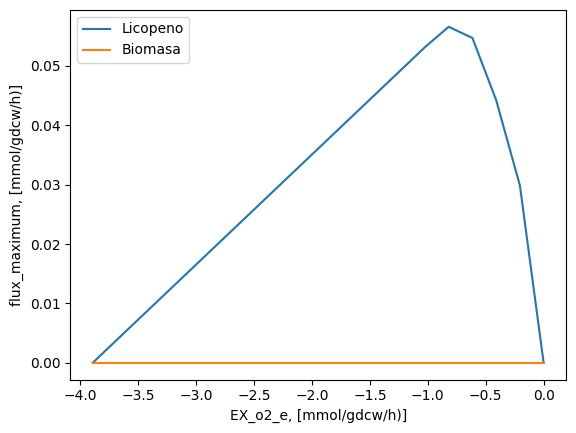

In [102]:
fig, ax = plt.subplots()
ax.plot(prod_env1['1992'],prod_env1['flux_maximum'], label = "Licopeno")
ax.plot(prod_env2['1992'],prod_env2['flux_maximum'], label = "Biomasa")
ax.set_xlabel("EX_o2_e, [mmol/gdcw/h)]")
ax.set_ylabel("flux_maximum, [mmol/gdcw/h)]")
ax.legend(loc = 'upper left')
plt.show()

8.2. Caso del nitrogeno

In [103]:
#Para el nitrógeno y producción de licopeno
#id NH4:1654
#id Glucosa: 1714
prod_env7 = production_envelope(
    modelyal1, ["1654"], objective="LYCO-dem", carbon_sources="1714")

In [104]:
prod_env7.head()

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,1654
0,1714,0.0,NaN,NaN,0.000000,NaN,NaN,-5.601895
1,1714,0.0,NaN,NaN,0.003546,NaN,NaN,-5.307058
2,1714,0.0,NaN,NaN,0.007091,NaN,NaN,-5.012222
3,1714,0.0,NaN,NaN,0.010637,NaN,NaN,-4.717385
4,1714,0.0,NaN,NaN,0.014182,NaN,NaN,-4.422548


In [106]:
#Para el nitrogeno y producción de biomasa
#id NH4:1654
#id Glucosa: 1714
#id Biomasa: 2111
prod_env8 = production_envelope(
    modelyal1, ["1654"], objective="2111", carbon_sources="1714")

In [107]:
prod_env8

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,1654
0,1714,0.0,NaN,NaN,0.0,NaN,NaN,-5.601895
1,1714,0.0,NaN,NaN,0.0,NaN,NaN,-5.307058
2,1714,0.0,NaN,NaN,0.0,NaN,NaN,-5.012222
3,1714,0.0,NaN,NaN,0.0,NaN,NaN,-4.717385
4,1714,0.0,NaN,NaN,0.0,NaN,NaN,-4.422548
5,1714,0.0,NaN,NaN,0.0,NaN,NaN,-4.127712
6,1714,0.0,NaN,NaN,0.0,NaN,NaN,-3.832875
7,1714,0.0,NaN,NaN,0.0,NaN,NaN,-3.538039
8,1714,0.0,NaN,NaN,0.0,NaN,NaN,-3.243202
9,1714,0.0,NaN,NaN,0.0,NaN,NaN,-2.948366


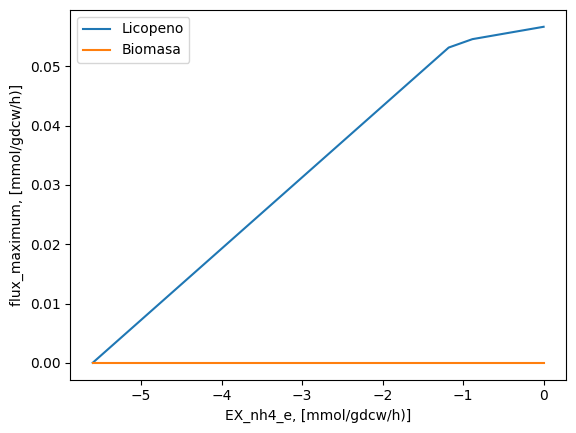

In [108]:
fig, ax = plt.subplots()
ax.plot(prod_env7['1654'],prod_env7['flux_maximum'], label = "Licopeno")
ax.plot(prod_env8['1654'],prod_env8['flux_maximum'], label = "Biomasa")
ax.set_xlabel("EX_nh4_e, [mmol/gdcw/h)]")
ax.set_ylabel("flux_maximum, [mmol/gdcw/h)]")
ax.legend(loc = 'upper left')
plt.show()

9. Identificar los demas knockout gene

In [109]:
modelyal1.reactions.get_by_id("760")

Reaction identifier,760
Name,N-acetylglucosamine-6-phosphate synthase
Memory address,0x79915e055e40
Stoichiometry,m550 + m68 <=> m10 + m69 + m815 alpha-D-glucosamine 6-phosphate_C6H14NO8P + acetyl-CoA_C23H38N7O17P3S <=> H+_p+1 + coenzyme A_C21H36N7O16P3S + N-acetyl-D-glucosamine 6-phosphate_C8H16NO9P
GPR,YALI0D20152g
Lower bound,-1000.0
Upper bound,1000.0


In [110]:
modelyal1.reactions.get_by_id("127")

Reaction identifier,127
Name,"acyl-CoA:sterol acyltransferase (oleoyl-CoA:ergosterol), ER membrane"
Memory address,0x79915e2fa560
Stoichiometry,m231 + m235 <=> m233 + m236 oleoyl-CoA_C39H68N7O17P3S + ergosterol_C28H44O <=> coenzyme A_C21H36N7O16P3S + ergosteryl oleate_C46H76O2
GPR,YALI0F06578g
Lower bound,-1000.0
Upper bound,1000.0


In [111]:
modelyal1.reactions.get_by_id("3722")

Reaction identifier,3722
Name,"ergosteryl oleate transport, ER membrane-lipid particle"
Memory address,0x79915d8d03a0
Stoichiometry,m236 <=> m1581 ergosteryl oleate_C46H76O2 <=> ergosteryl oleate_C46H76O2
GPR,
Lower bound,-1000.0
Upper bound,1000.0


**7.7. Visualización de flujos con fluxer**
https://fluxer.umbc.edu/

Fluxer es una aplicación web para el cálculo y la visualización interactiva de gráficos de flujo a partir de modelos metabólicos a escala genómica. Los modelos metabllicos deben estar en el formato SBML

Para graficar los flujos metabolicós con la elimincion del gen PGM2

In [113]:
#Para importr las librerias necesarias para guardar nuestro modelo metablico en SBML
from pathlib import Path
from cobra.io import load_json_model, save_json_model, load_matlab_model, save_matlab_model, read_sbml_model, write_sbml_model
import logging

In [114]:
write_sbml_model(modelyal1, "modelPGM2.xml")